<a href="https://colab.research.google.com/github/sofiasilingardi16/Misogyny-Repeated-and-Reposted/blob/main/Coding_SUB_RQ_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

DATA_DIR = "/content/drive/MyDrive/your_project"
TSV_PATH = os.path.join(DATA_DIR, "test.tsv")
df = pd.read_csv(file_path, sep='\t')
print(df.head())

   file_name  label  shaming  stereotype  objectification  violence  \
0  15236.jpg      0        0           0                0         0   
1  15805.jpg      1        0           1                1         0   
2  16254.jpg      0        0           0                0         0   
3  16191.jpg      1        0           1                1         0   
4  15952.jpg      0        0           0                0         0   

                                                text  
0  FACEBOOK SINGLES GROUPS BELIKE WHEN A NEW WOMA...  
1    SO, IF YOU'RE A FEMINIST HOW CAN YOU EAT DAIRY?  
2         WHEN A CUTE GIRL LEFT YOUR MESSAGE ON SEEN  
3  Photographing something you want to show every...  
4  HEY BABE CAN YOU MAKE ME A SANDWICH? Hey babe ...  


In [ ]:
# PREPROCESSING - LOWERCASING, REMOVING PUNCTUATION & LEMMATIZING
import spacy, string
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

stop = nlp.Defaults.stop_words
punct = str.maketrans("", "", string.punctuation)

def clean(txt):
    return [
        t.lemma_ for t in nlp(txt.translate(punct).lower())
        if t.lemma_.isalnum() and t.lemma_ not in stop
    ]
df["tokens"] = df["text"].fillna("").apply(clean)

In [ ]:
# Checking if spaCy has maintained  slurs

def search_word(df, word):
    """
    Searches for a specific word in the 'tokens' column of a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame to search.
        word (str): The word to search for.

    Returns:
        pandas.DataFrame: A DataFrame containing the rows where the word was found.
                         Returns None if the word is not found.
    """
    # Apply a function to check if the word is in the 'tokens' list for each row
    # and filter the DataFrame based on the result.
    results = df[df['tokens'].apply(lambda tokens: word in tokens)]

    # Return the results if found, otherwise None
    if len(results) > 0:
        return results
    else:
        return None

# Example usage:
results = search_word(df, 'bitch')

if results is not None:
    print(results)
else:
    print("No results found or an error occurred.")

     file_name  label  shaming  stereotype  objectification  violence  \
81   15504.jpg      1        1           1                1         0   
98   16004.jpg      1        1           0                1         1   
114  16270.jpg      1        0           1                1         1   
145  15964.jpg      1        0           1                1         0   
158  15231.jpg      1        0           1                1         0   
161  15466.jpg      0        0           0                0         0   
171  16079.jpg      1        0           1                1         0   
194  15779.jpg      1        1           1                1         0   
240  15092.jpg      0        0           0                0         0   
245  16336.jpg      0        0           0                0         0   
249  15982.jpg      1        0           1                1         0   
269  15953.jpg      1        0           1                1         1   
292  15830.jpg      0        0           0         

In [ ]:
# KEY WORDS EXTRACTION
from collections import Counter

misog = df[df["label"] == 1]

words = Counter(w for row in misog["tokens"] for w in row)
top_words = words.most_common(30)
print(top_words)

[('I', 198), ('woman', 115), ('like', 55), ('bitch', 54), ('meme', 51), ('girl', 50), ('man', 44), ('m', 33), ('look', 28), ('know', 24), ('kitchen', 24), ('good', 22), ('imgflipcom', 21), ('memegeneratornet', 21), ('girlfriend', 20), ('s', 20), ('sandwich', 20), ('quickmemecom', 20), ('tell', 20), ('want', 19), ('fat', 19), ('rape', 18), ('cheat', 18), ('need', 18), ('object', 17), ('sex', 17), ('big', 16), ('hit', 16), ('milf', 16), ('ass', 14)]


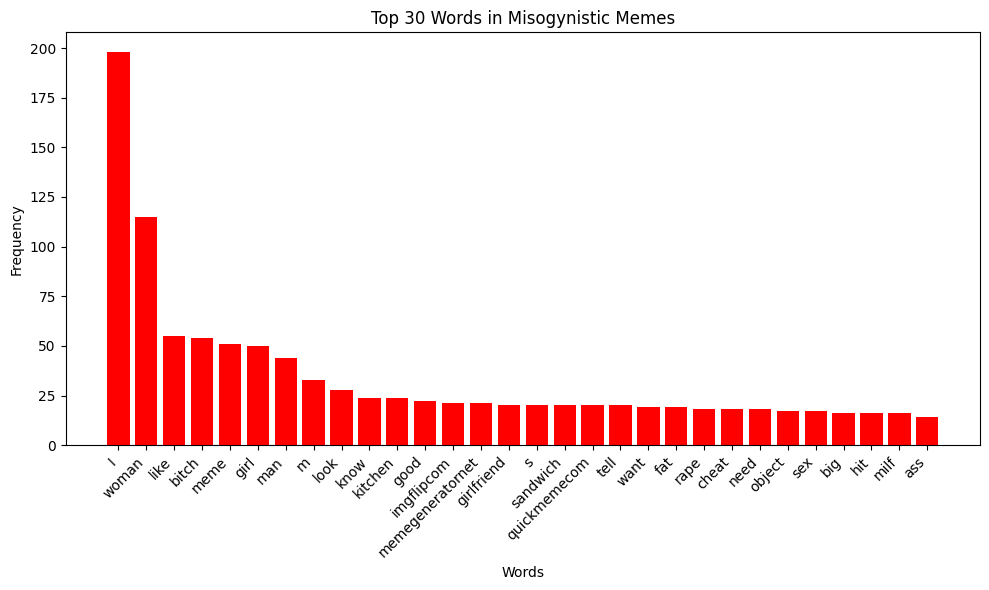

In [ ]:
# Visualizing in a bar plot

import matplotlib.pyplot as plt

# Assuming 'top_words' is defined as in the previous code
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(words, counts, color='red')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Words in Misogynistic Memes")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
# Finding verbs that co-occur with gendered nouns
from collections import defaultdict

verbs = defaultdict(Counter)
for toks in misog["tokens"]:
    for i, tok in enumerate(toks):
        if tok in {"woman", "girl", "she", "her", "feminists", "bitch"}:
            for j in range(max(0,i-2), min(len(toks), i+3)):
                if toks[j] != tok and toks[j].endswith("e"):  # crude verb filter
                    verbs[tok][toks[j]] += 1

# show top 5 verbs per gender noun
for g in verbs:
    print(f"\n{g}:", verbs[g].most_common(10))



woman: [('like', 7), ('rape', 5), ('meme', 4), ('female', 3), ('white', 3), ('male', 2), ('difference', 2), ('love', 2), ('nonsense', 2), ('rule', 2)]

girl: [('meme', 6), ('like', 3), ('cute', 2), ('type', 2), ('license', 1), ('college', 1), ('image', 1), ('rice', 1), ('introduce', 1), ('handle', 1)]

bitch: [('like', 6), ('love', 6), ('roofie', 3), ('ve', 1), ('meme', 1), ('hate', 1), ('little', 1), ('choose', 1)]


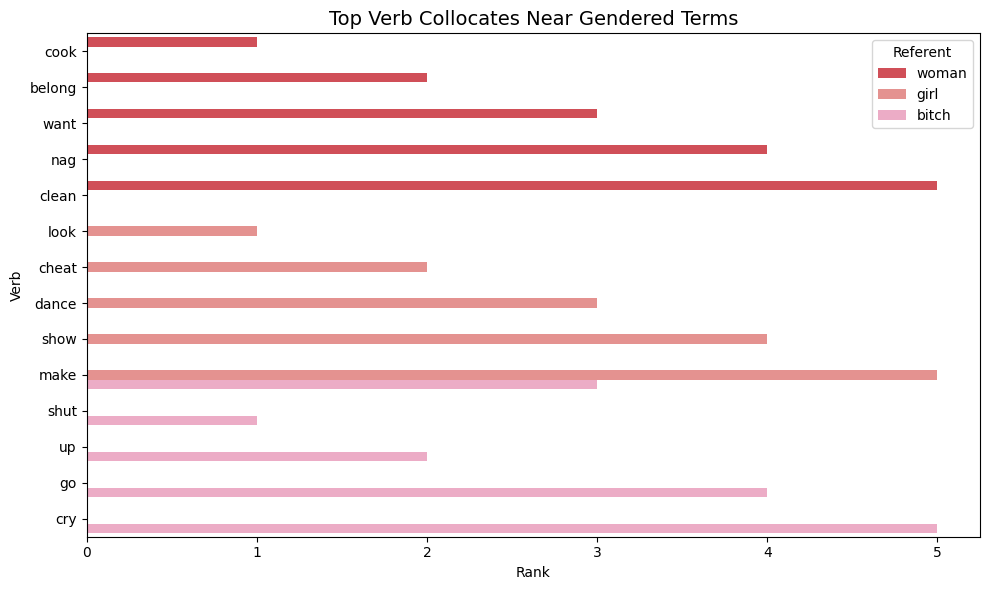

In [ ]:
# Visualizing Top Verbs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict

# Sample collocate results from your actual data
verbs = {
    "woman": Counter({"cook": 10, "belong": 8, "want": 7, "nag": 6, "clean": 5}),
    "girl": Counter({"look": 9, "cheat": 7, "dance": 6, "show": 5, "make": 5}),
    "bitch": Counter({"shut": 10, "up": 9, "make": 8, "go": 7, "cry": 6})
}

# Convert collocates to DataFrame
plot_data = []
for referent, verb_counts in verbs.items():
    for rank, (verb, count) in enumerate(verb_counts.most_common(5), start=1):
        plot_data.append({
            "referent": referent,
            "verb": verb,
            "rank": rank,
            "count": count
        })

df_plot = pd.DataFrame(plot_data)

# Set custom red/pink color palette
custom_palette = {
    'woman': '#e63946',   # strong red
    'girl': '#f28482',    # rose
    'bitch': '#f7a1c4'    # soft pink
}

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_plot,
    x='rank',
    y='verb',
    hue='referent',
    dodge=True,
    palette=custom_palette
)

plt.title("Top Verb Collocates Near Gendered Terms", fontsize=14)
plt.xlabel("Rank")
plt.ylabel("Verb")
plt.legend(title='Referent')
plt.tight_layout()
plt.show()



In [ ]:
# Tropes divided by sub-label (violence, stereotype, objectification, stereotype)
for label in ["shaming", "violence", "objectification", "stereotype"]:
    subset = df[df[label] == 1]
    wc = Counter(w for row in subset["tokens"] for w in row)
    print(f"\nTOP for {label.upper()}:")
    print(wc.most_common(10))


TOP for SHAMING:
[('I', 44), ('woman', 22), ('like', 22), ('fat', 18), ('m', 15), ('meme', 14), ('bitch', 13), ('big', 12), ('girl', 12), ('look', 11)]

TOP for VIOLENCE:
[('I', 90), ('woman', 53), ('bitch', 29), ('rape', 18), ('girl', 15), ('hit', 15), ('like', 14), ('man', 13), ('sandwich', 12), ('meme', 12)]

TOP for OBJECTIFICATION:
[('I', 125), ('woman', 69), ('like', 46), ('bitch', 42), ('meme', 40), ('girl', 39), ('man', 28), ('good', 21), ('look', 20), ('know', 18)]

TOP for STEREOTYPE:
[('I', 131), ('woman', 91), ('bitch', 45), ('man', 39), ('like', 39), ('girl', 37), ('meme', 28), ('m', 24), ('kitchen', 24), ('know', 22)]


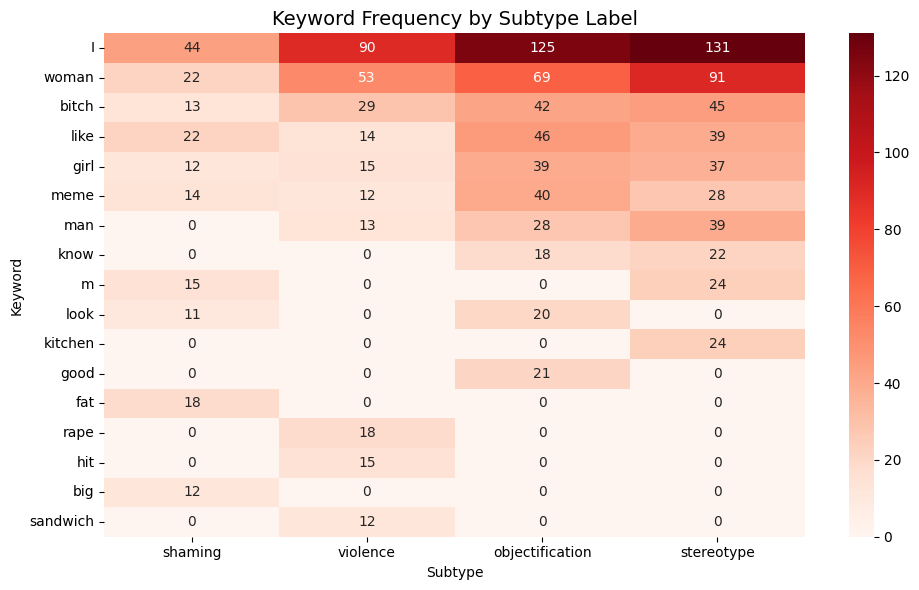

In [ ]:
# Count keywords by subtype
labels = ["shaming", "violence", "objectification", "stereotype"]
subtype_keywords = {}

for label in labels:
    subset = df[df[label] == 1]
    wc = Counter(w for row in subset["tokens"] for w in row)
    # Take top 10 for each subtype (or adjust as needed)
    subtype_keywords[label] = dict(wc.most_common(10))

# Create a DataFrame from Counters
subtype_df = pd.DataFrame(subtype_keywords).fillna(0).astype(int)

# sort rows by total frequency across subtypes
subtype_df["total"] = subtype_df.sum(axis=1)
subtype_df = subtype_df.sort_values("total", ascending=False).drop(columns="total")

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(subtype_df, annot=True, fmt='d', cmap='Reds')
plt.title("Keyword Frequency by Subtype Label", fontsize=14)
plt.xlabel("Subtype")
plt.ylabel("Keyword")
plt.tight_layout()
plt.show()

In [ ]:
# prompt: how to save on drive a csv with only columns file_name and text with label ==1

# Filter the DataFrame to keep only rows where 'label' is 1
df_filtered = df[df['label'] == 1]

# Select only the 'file_name' and 'text' columns
df_to_save = df_filtered[['file_name', 'text']]

# Define the path where you want to save the CSV file in Google Drive
save_path = '/content/drive/MyDrive/MA THESIS/CODE FOR THESIS/filtered_data.csv'

# Save the filtered DataFrame to a CSV file
df_to_save.to_csv(save_path, index=False)

print(f"Filtered data saved to {save_path}")

Filtered data saved to /content/drive/MyDrive/MA THESIS/CODE FOR THESIS/filtered_data.csv
